In [ ]:
!pip install jupyter_contrib_nbextensions #instalando nb-extensions

In [3]:
#importando bibliotecas
import pandas as pd
import numpy as np

In [4]:
#importando csv pro collab
from google.colab import files
uploaded = files.upload()


Saving kc_house_data.csv to kc_house_data.csv


In [5]:
#lendo o arquivo csv e definindo uma váriavel pra ele
import io
data = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [ ]:
#arrumando as notações cientificas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
### GROUPBY, Função que (neste caso) vai separa todos os 'id' pelos diferente valores de 'bedrooms'
df_grouped = data[['id', 'bedrooms']].groupby('bedrooms') 

In [ ]:
#Fazendo um laço de repetição, para cada quantidade diferente de 'bedrooms', retornar o numero de quartos
for bedrooms, frame in df_grouped:
    print( 'numero de quartos:{}' .format(bedrooms))
    print(frame.shape, end= '\n\n')

#repondendo as perguntas do CEO


In [ ]:
#1. Qual o numero de imoveis por ano de construção?
data[['id', 'yr_built']].groupby('yr_built').count()

In [ ]:
#2. Qual o menor numero de quartos por anos de construção?
data[['bedrooms', 'yr_built']].groupby('yr_built').min()

In [ ]:
# 3. Qual o preço de compra mais alto por numero de quartos?
data[['price', 'bedrooms']].groupby('bedrooms').max()

In [ ]:
#4. Qual a soma de todos os preços de compra por numero de quartos?
data[['price', 'bedrooms']].groupby('bedrooms').sum()

In [ ]:
#5. Qual a soma de todos os preços de compra por numero de quartos e banheiros?
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

In [ ]:
#6. Qual o tamanho médio das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()


In [ ]:
#7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

In [ ]:
#7. Qual o desvio padrão das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

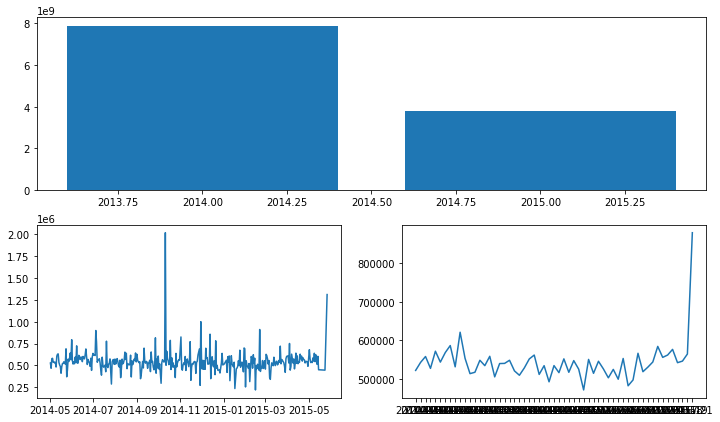

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

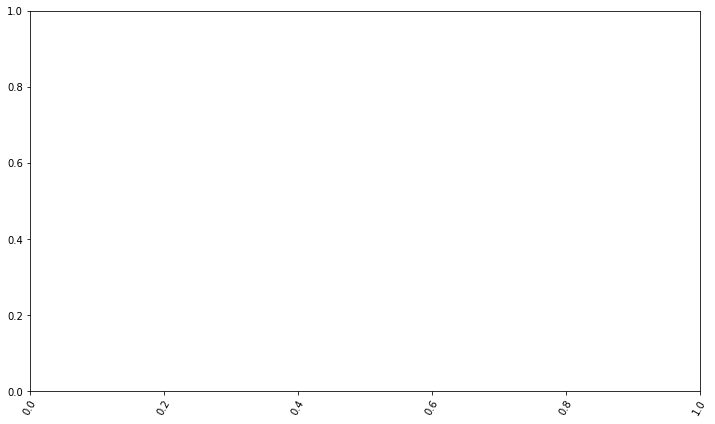

In [6]:
#9 como é o crescimento médio de preços de compras por ano, dia e pela semana do ano?

from matplotlib import pyplot as plt #importando bibliotecas e funções que desenham graficos

from matplotlib import gridspec
### CRIANDO O DASHBOAR

fig = plt.figure(figsize=(12,7))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) #firstrow
ax2 = fig.add_subplot(specs[1, 0]) #secondrow, first colunm
ax3 = fig.add_subplot(specs[1, 1]) #secondrow, second colunm

### CRESCIMENTO TOTAL DE PREÇOS DE COMPRAS POR ANO - GRAFICO 1
# EIXO X - ANOS
# EIXO Y - SOMA DOS PREÇOS
# GRAFICO - BARRAS
data['year'] = pd.to_datetime(data['date']).dt.year ## Criando uma coluna nova com o tipo de dado 'datetime' formato YEAR
by_year = data[['price', 'year']].groupby('year').sum().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(12, 7)) ## Ajustando o tamanho do gráfico
ax1.bar(by_year['year'], by_year['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

### CRESCIMENTO DO PREÇO MÉDIO POR DIAS
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index() 
plt.figure(figsize=(12, 7))
ax2.plot(by_day['day'], by_day['price']) 

### CRESCIMENTO DO PREÇO MEDIO POR SEMANAS DO ANO
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index() 
plt.figure(figsize=(12, 7))
ax3.plot(by_week['year_week'], by_week['price'])
plt.xticks(rotation=60); ### arrumando as informações do eixo X pra ficarem visíveis





In [ ]:
#10. Fazendo um mapa que consegue identificar as casas com o maior preço.

import plotly.express as px

# house = data[['id', 'lat', 'long', 'price']]

# fig1 = px.scatter_mapbox(house,
#                          lat='lat',
#                          lon='long',
#                          size='price',
#                          color_continuous_scale=px.colors.cyclical.IceFire,
#                          size_max=15,
#                          zoom=10)

# fig1.update_layout(mapbox_style = 'open-street-map')
# fig1.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
# fig1.show()

EXERCÍCIOS

In [ ]:
# 1 Crie uma nova coluna 'dormitory_type', onde: bedrooms = 1 (studio), bedrooms = 2 (apartament), bedrooms > (house)
data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else
                                                           'apartment' if x == 2 else
                                                           'house' if x > 2 else 'NA')

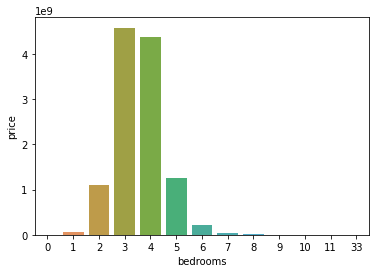

In [ ]:
#### OUTRO TIPO DE LIBRARY DE GRAFICOS

import seaborn as sbn

by_bedroom = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sbn.barplot(x='bedrooms', y='price', data=by_bedroom)

<BarContainer object of 13 artists>

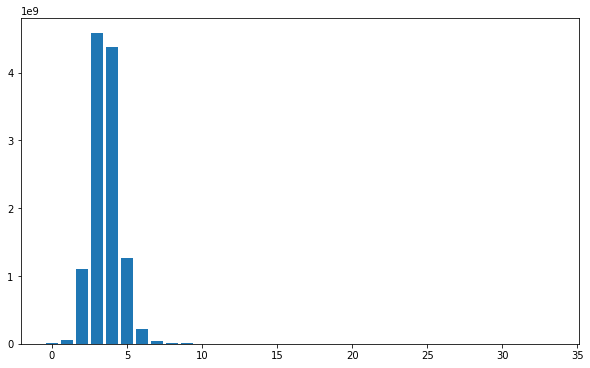

In [ ]:
# 2 Faça um gráfico de barras que represente a soma dos preços pelo número de quartos
#DUVIDA COMO ARRUMAR NOTAÇÃO CIENTIFICA NOS GRÁFICOS
# EIXO X - Quartos
# # EIXO Y - SOMA DOS PREÇOS
# # GRAFICO - BARRAS
by_bedroom = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index() ## Filtrando as somas de preço por numero de quartos
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
plt.bar(by_bedroom['bedrooms'], by_bedroom['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

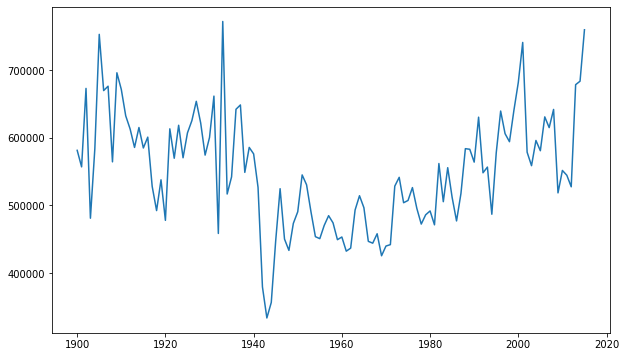

In [ ]:
# 3 Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imoveis
# # EIXO X - ANOS
# # EIXO Y - MEDIA DOS PREÇOS
# # GRAFICO - LINHAS
by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
plt.plot(by_year['yr_built'], by_year['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

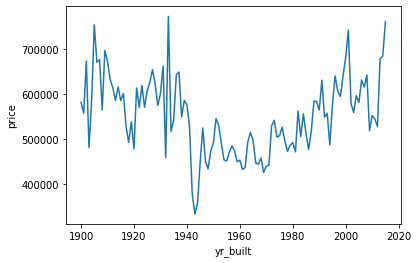

In [ ]:
### opção 2 de gráfico

sbn.lineplot(x='yr_built', y='price', data=by_year)

<BarContainer object of 4 artists>

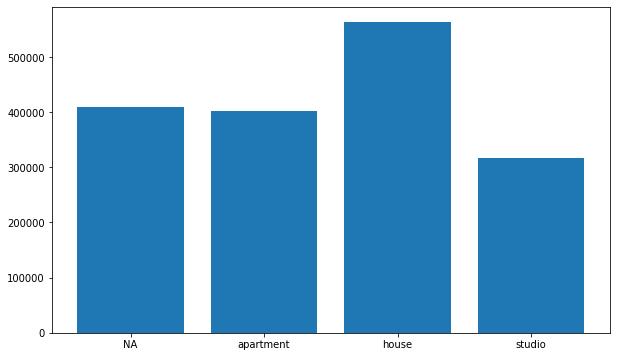

In [ ]:
# 4 Faça um gráfico de barras que represente a a média dos preços pelo tipo de dormitorio
# # EIXO X - TIPO DE DORMITORIO
# # EIXO Y - MEDIA DOS PREÇOS
# # GRAFICO - barras
by_dormtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
plt.bar(by_dormtype['dormitory_type'], by_dormtype['price'])

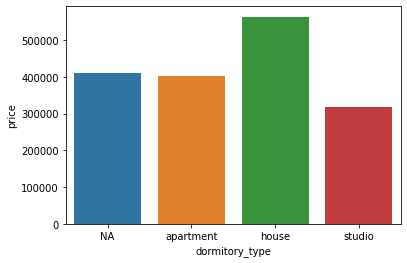

In [ ]:
### opção 2 de gráfico
sbn.barplot(x='dormitory_type', y='price', data=by_dormtype)

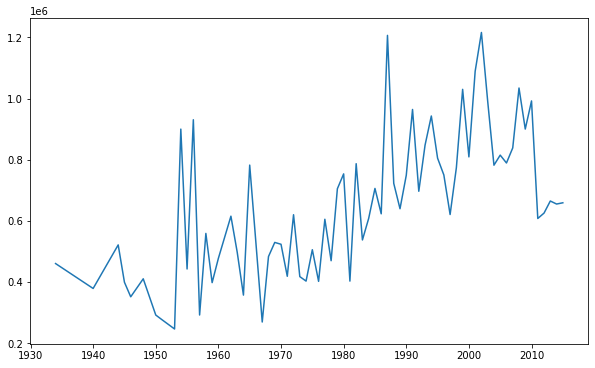

In [ ]:
# 5 Faça um gráfico de linha que mostre a evolução da méia dos preços pelo ano da reforma dos imóveis, a partir de 1930.
# # EIXO X - TIPO DE DORMITORIO
# # EIXO Y - MEDIA DOS PREÇOS
# # GRAFICO - LINHAS
data['yr_renovated'] = data['yr_renovated'].apply(
                                     lambda q: pd.to_datetime('1900-01-01', format='%Y-%m-%d') if q == 0 else ##AJUSTANDO A COLUNA
                                     pd.to_datetime(q, format='%Y'))
data['yr_renovated'] = pd.to_datetime(data['yr_renovated']).dt.year #ajustando o tipo de data pra formato YEAR
by_yrrenovated = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
plt.plot(by_yrrenovated['yr_renovated'], by_yrrenovated['price'])

##TALVEZ DESSE PRA TER FEITO COM GROUPBY E DROPNA (remove os valores nulos)

### teste = data[['price', 'floors']].groupby('floors').mean().query('floors > 1') POSISVEL USAR GROUPBY E QUERY NO MESMO COMANDO
### OUTRA POSSIVEL SOLUÇAO SEM TRANSFORMAR O TIPO DE DADO DA COLUNA
### by_yrrenovated = data[['price', 'yr_renovated']].groupby('yr_renovated').mean().query('yr_renovated >= 1930').reset_index()

In [ ]:
# 6 Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis.
table1 = data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()
table1.to_csv('table1.csv', index=False)
table1

,yr_built,dormitory_type,price
0,1900,apartment,589533.333333
1,1900,house,584854.271429
2,1900,studio,398944.000000
3,1901,apartment,452856.400000
4,1901,house,578619.166667
...,...,...,...
309,2014,house,692687.716981
310,2014,studio,516500.000000
311,2015,apartment,543250.000000
312,2015,house,797383.060606


<BarContainer object of 4 artists>

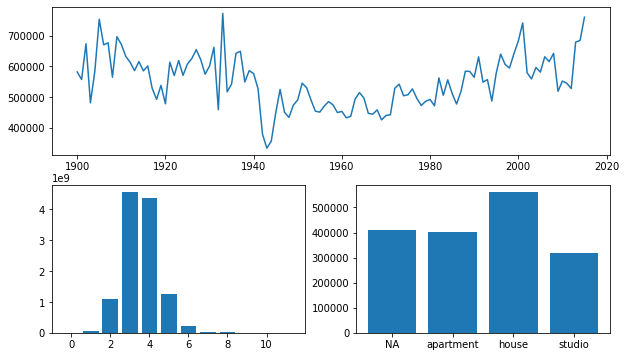

<Figure size 720x432 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
# 7 Crie um dashboard com os gráficos das questões 02, 03, 04 - 1 linhas e 2 colunas

#importando biblioteca de funções p dashboard

from matplotlib import gridspec

#DASHBOARD
fig = plt.figure(figsize=(10,6))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) #firstrow
ax2 = fig.add_subplot(specs[1, 0]) #secondrow, first colunm
ax3 = fig.add_subplot(specs[1, 1]) #secondrow, second colunm

#GRAFICO 1
by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax1.plot(by_year['yr_built'], by_year['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

#GRAFICO 2
by_bedroom = data[['price', 'bedrooms']].groupby('bedrooms').sum().query('bedrooms < 30').reset_index() ## Filtrando as somas de preço por numero de quartos
plt.figure(figsize=(10, 3)) ## Ajustando o tamanho do gráfico
ax2.bar(by_bedroom['bedrooms'], by_bedroom['price']) 

#GRAFICO 3
by_dormtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax3.bar(by_dormtype['dormitory_type'], by_dormtype['price'])

<BarContainer object of 4 artists>

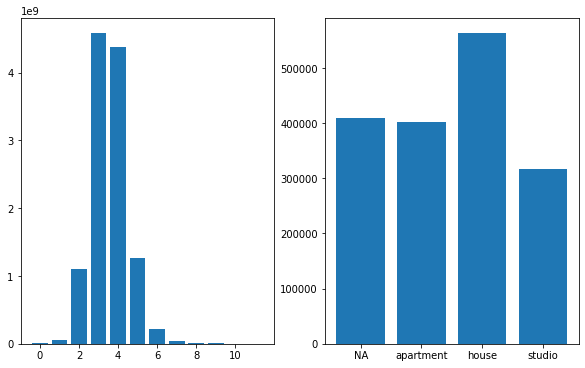

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
# 8 Crie um dashboard com os gráficos das questões 02, 04 - 2 colunas

#DASHBOARD
fig = plt.figure(figsize=(10,6))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) #firstcolumn
ax2 = fig.add_subplot(specs[0, 1]) #secondcolumn

#GRAFICO1
by_bedroom = data[['price', 'bedrooms']].groupby('bedrooms').sum().query('bedrooms < 30').reset_index() ## Filtrando as somas de preço por numero de quartos
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax1.bar(by_bedroom['bedrooms'], by_bedroom['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

#GRAFICO2
by_dormtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax2.bar(by_dormtype['dormitory_type'], by_dormtype['price'])



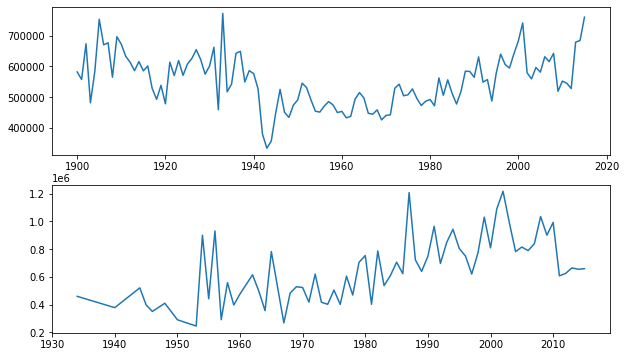

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
# 9 Crie um dashboard com os gráficos das questões 03, 05 - 2 linhas

#DASHBOARD
fig = plt.figure(figsize=(10,6))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) #firstrow
ax2 = fig.add_subplot(specs[1, 0]) #secondrow

#GRAFICO1
by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax1.plot(by_year['yr_built'], by_year['price']) ##criando o gráfico de barras Eixo x - ano Eixo y - preço

#GRAFICO2
by_yrrenovated = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index() ## Filtrando as somas de preço por ano
plt.figure(figsize=(10, 6)) ## Ajustando o tamanho do gráfico
ax2.plot(by_yrrenovated['yr_renovated'], by_yrrenovated['price'])


